<a href="https://colab.research.google.com/github/SuperTonik/Hobby/blob/main/MachineLearning/cnn_ct_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hemorrhage classifier using CNN
Work in progress.

In [52]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("anmspro/head-ct-hemorrhage-128-x-128")

subfolder = os.listdir(path)
path = os.path.join(path, subfolder[0])
classes = os.listdir(path)
print("Path to dataset files:", path)
print(classes)

Path to dataset files: /root/.cache/kagglehub/datasets/anmspro/head-ct-hemorrhage-128-x-128/versions/1/head_ct (128x128)
['no hemorrhage', 'hemorrhage']


Loading data

In [75]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torch.utils.data import DataLoader, random_split

device = torch.device("cuda" if torch.cuda.is_available else "cpu")
print(device)

my_transform = transforms.Compose(
    [transforms.ToTensor(),
      transforms.Normalize([0.5, 0.5, 0.5],
                           [0.5, 0.5, 0.5])])

full_dataset = ImageFolder(path, transform=my_transform)

train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

cuda


Examining dataset

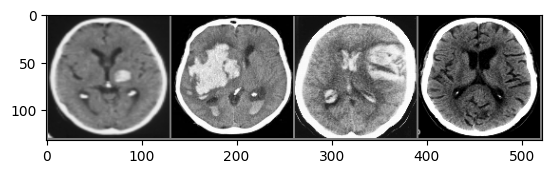

hemorrhage, hemorrhage, hemorrhage, no hemorrhage,


In [77]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  # utility function for plotting images.
  # from pytorch docs.
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

images, labels = next(iter(train_loader))
imshow(make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s},' for j in range(batch_size)))